In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
# 加载数据
data = pd.read_csv('../data/economic_forecast/年度数据.csv').iloc[:,1:]

In [5]:
# 提取特征和目标变量
features = data.drop(['国内生产总值(亿元)','商品出口贸易总额(亿美元)','商品进口贸易总额(亿美元)'], axis=1).values
target = data['国内生产总值(亿元)'].values

In [6]:
# 数据归一化
scaler = MinMaxScaler()

In [7]:
scaled_features = scaler.fit_transform(features)

In [8]:
# X_scaled = (X - X_min) / (X_max - X_min)
X_scaled=(target[1:]-target[:-1])/target[:-1]
X_scaled

array([0.16598933, 0.23579907, 0.31177996, 0.36341848, 0.26116474,
       0.17074857, 0.11002651, 0.06875118, 0.06301859, 0.10727946,
       0.1055344 , 0.09790724, 0.1290251 , 0.17768771, 0.15743122,
       0.17147015, 0.2308337 , 0.18198334, 0.09169489, 0.18249174,
       0.18397804, 0.1037828 , 0.10097516, 0.08533396, 0.07038175,
       0.08352503, 0.11473923, 0.10485749, 0.07313769, 0.02742157,
       0.133854  , 0.05305276])

In [9]:
# 数据分割为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(scaled_features[1:], X_scaled, test_size=0.2, random_state=42)

In [10]:
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)

In [11]:
X_test

array([[[0.83494972, 1.        , 0.95      , 0.85999159, 0.        ,
         0.06993007, 0.86953501, 0.        , 0.90907451, 0.00505051,
         0.81507016, 0.98121478]],

       [[0.17938954, 0.61262376, 0.9       , 0.20471182, 0.79329609,
         0.25524476, 0.17579699, 0.83928571, 0.16184311, 0.3047138 ,
         0.11085825, 0.53141307]],

       [[0.57427262, 0.75990099, 0.9       , 0.62869163, 0.60893855,
         0.08391608, 0.58539704, 0.47321429, 0.69805822, 0.1043771 ,
         0.51594669, 0.83239407]],

       [[0.26699589, 0.66089109, 0.95      , 0.28523349, 0.67597765,
         0.28321678, 0.251619  , 0.66071429, 0.24358313, 0.33333333,
         0.15778221, 0.63932373]],

       [[0.06623431, 0.2759901 , 0.4       , 0.07951199, 0.62011173,
         0.6048951 , 0.07173629, 0.58035714, 0.04406258, 0.04545455,
         0.03449395, 0.45042789]],

       [[0.07471887, 0.30074257, 0.4       , 0.09028187, 0.73743017,
         0.48951049, 0.07829567, 0.38392857, 0.04938917, 0.13

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25, 1, 12)
(7, 1, 12)
(25,)
(7,)


In [13]:
# 构建模型
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=32, activation='relu', input_shape=(1, X_train.shape[2])),
    tf.keras.layers.Dense(units=5, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

In [14]:
# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
# 训练模型
model.fit(X_train, y_train, epochs=500, batch_size=32)

Epoch 1/500


2023-05-17 12:08:04.810127: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 1s 618ms/step - loss: 0.0248
Epoch 2/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0233
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0205
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0191
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0179
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0166
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0155
Epoch 9/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0145
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0135
Epoch 11/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 12/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 13/500
1/1 [==============================] - 0s 2ms/step - loss:

In [16]:
# 评估模型
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

1/1 [==============================] - 0s 94ms/step - loss: 6.0519e-04
Test Loss: 0.0006051873788237572


1/1 [==============================] - 0s 17ms/step


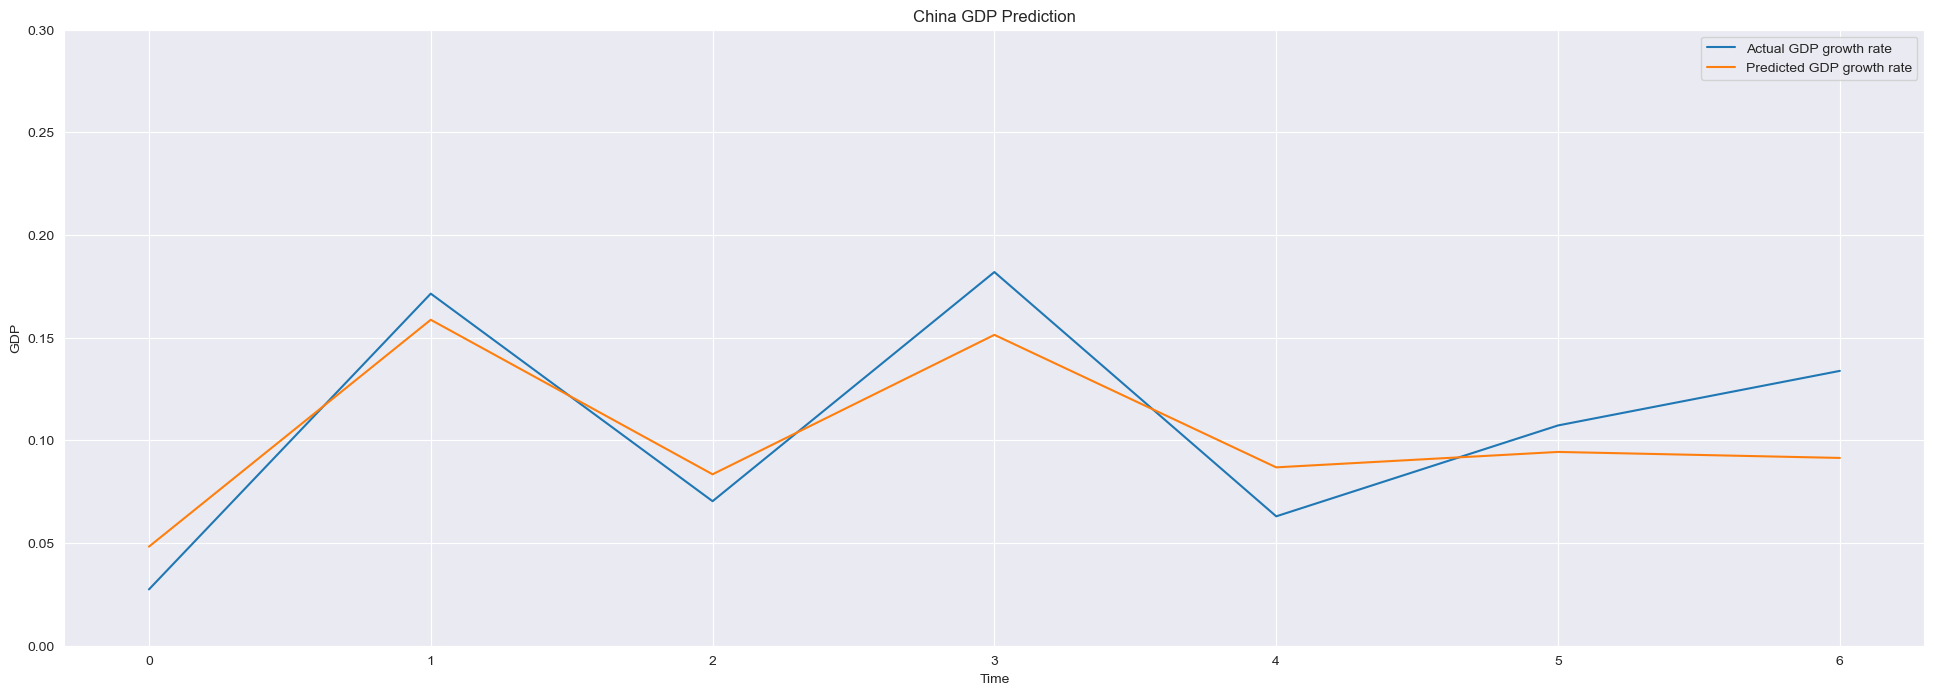

In [27]:
# 使用模型进行预测
predicted_values = model.predict(X_test)

# 可视化预测结果
plt.figure(figsize=(24,8))
plt.plot(y_test, label='Actual GDP growth rate')
plt.plot(predicted_values, label='Predicted GDP growth rate')
plt.title('China GDP Prediction')
plt.xlabel('Time')
plt.ylabel('GDP')
plt.ylim([0,0.3])
plt.legend()
plt.show()


In [28]:
predicted_gdp=[]
gdp_2015=target[-8]
for i in predicted_values:
    if len(predicted_gdp)==0:
        gdp=gdp_2015
    else:
        gdp=predicted_gdp[-1]
    predicted_gdp.append(gdp*(1+i))

In [29]:
predicted_gdp

[array([722098.2], dtype=float32),
 array([836725.4], dtype=float32),
 array([906579.1], dtype=float32),
 array([1043834.2], dtype=float32),
 array([1134512.2], dtype=float32),
 array([1241585.5], dtype=float32),
 array([1355131.8], dtype=float32)]

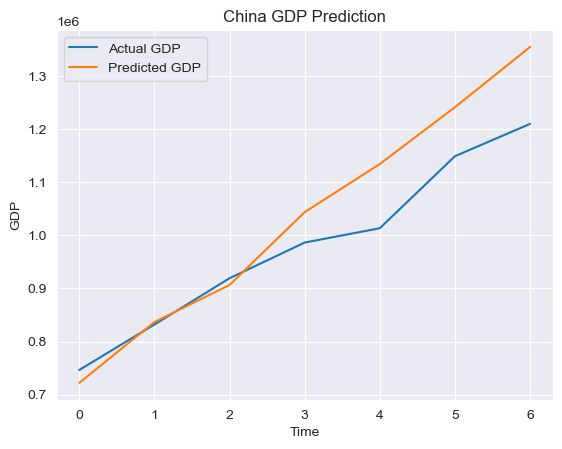

In [30]:
plt.plot(target[26:], label='Actual GDP')
plt.plot(predicted_gdp, label='Predicted GDP')
plt.title('China GDP Prediction')
plt.xlabel('Time')
plt.ylabel('GDP')
plt.legend()
plt.show()